In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

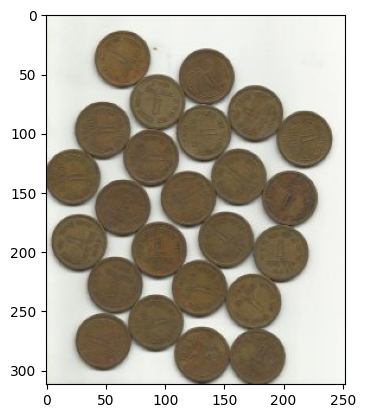

In [3]:
img = cv2.imread('water_coins.jpg')
plt.imshow(img[:,:,::-1])

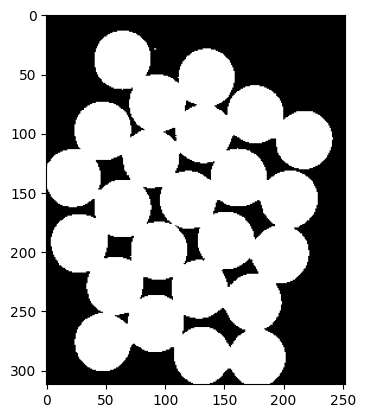

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, img_bin = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(img_bin, cmap="gray")


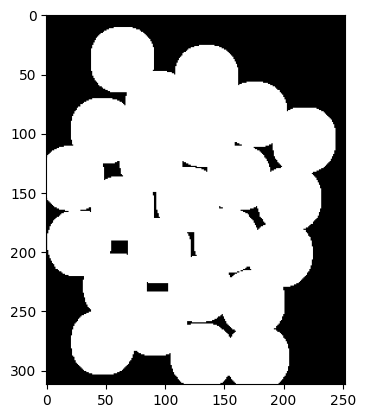

In [10]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_bin,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap="gray")

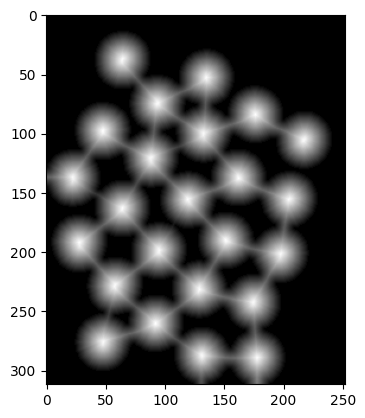

In [11]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap="gray")

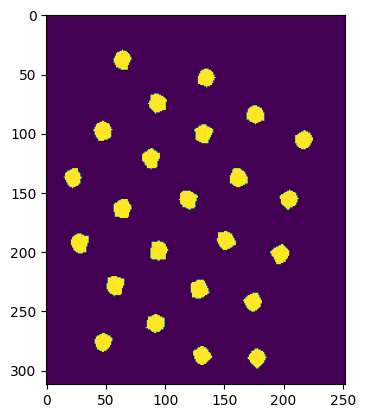

In [13]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg)

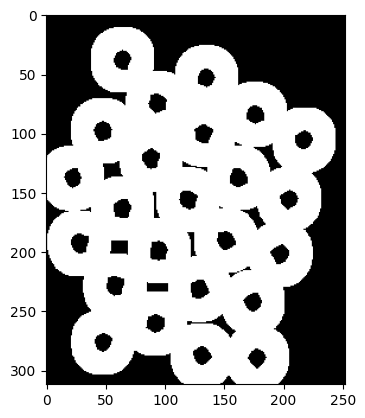

In [16]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap="gray")

In [18]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [20]:
markers_w = markers.copy()
markers_w = cv2.watershed(img, markers_w)

(<Axes: title={'center': 'final'}>,
 (-0.5, 251.5, 311.5, -0.5),
 Text(0.5, 1.0, 'final'))

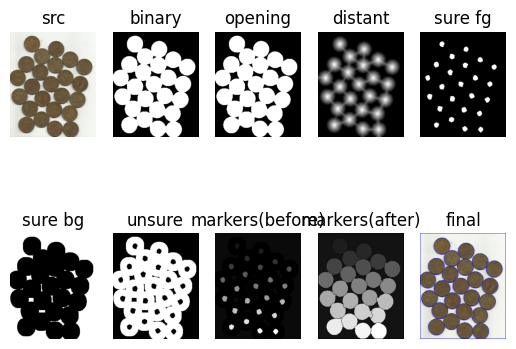

In [23]:
img_final  = img.copy()
img_final[markers_w == -1] = [255,0,0]

plt.subplot(2,5,1), plt.imshow(img[:,:,::-1]), plt.axis('off'), plt.title('src')
plt.subplot(2,5,2), plt.imshow(img_bin, cmap='gray'), plt.axis('off'), plt.title('binary') 
plt.subplot(2,5,3), plt.imshow(opening, cmap='gray'), plt.axis('off'), plt.title('opening') 
plt.subplot(2,5,4), plt.imshow(dist_transform, cmap='gray'), plt.axis('off'), plt.title('distant') 
plt.subplot(2,5,5), plt.imshow(sure_fg, cmap='gray'), plt.axis('off'), plt.title('sure fg')
plt.subplot(2,5,6), plt.imshow(sure_bg, cmap='gray_r'), plt.axis('off'), plt.title('sure bg')
plt.subplot(2,5,7), plt.imshow(unknown, cmap='gray'), plt.axis('off'), plt.title('unsure')
plt.subplot(2,5,8), plt.imshow(markers, cmap='gray'), plt.axis('off'), plt.title('markers(before)')
plt.subplot(2,5,9), plt.imshow(markers_w, cmap='gray'), plt.axis('off'), plt.title('markers(after)')
plt.subplot(2,5,10), plt.imshow(img_final[:,:,::-1]), plt.axis('off'), plt.title('final')